In [38]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
SRC_PATH = os.path.join(PROJECT_ROOT, "src")

if SRC_PATH not in sys.path:
        sys.path.append(SRC_PATH)

In [40]:
from simulator.simulate import run_simulation
from features.interaction_features import extract_interaction_features

# Generate synthetic users, items, and interactions
users, items, logs = run_simulation(
    num_users=50,
    num_items=30,
    steps_per_user=20,
    seed=42
)

print(f"Num users: {len(users)}")
print(f"Num items: {len(items)}")
print(f"Num interactions: {len(logs)}")


Num users: 50
Num items: 30
Num interactions: 847


In [41]:
features = extract_interaction_features(logs=logs, users=users, items=items)

In [42]:
features.columns

Index(['user_id', 'item_id', 'success', 'quiz_score', 'time_spent',
       'skill_match', 'difficulty', 'dropout_sensitivity', 'num_prerequisites',
       'estimated_time', 'step', 'skill_gap', 'fraction_skills_mastered',
       'difficulty_gap', 'user_success_rate', 'user_avg_quiz', 'user_avg_time',
       'user_num_attempts', 'item_avg_success', 'item_avg_quiz',
       'item_avg_time', 'item_num_skills'],
      dtype='object')

In [43]:
features.head()

,user_id,item_id,success,quiz_score,time_spent,skill_match,difficulty,dropout_sensitivity,num_prerequisites,estimated_time,...,fraction_skills_mastered,difficulty_gap,user_success_rate,user_avg_quiz,user_avg_time,user_num_attempts,item_avg_success,item_avg_quiz,item_avg_time,item_num_skills
0,0,19,1,91.557699,26.359210,0.390272,2,0.226909,0,20.314097,...,0.0,-1.055072,0.000000,0.000000,0.000000,0,0.0,0.000000,0.00000,1
1,0,28,1,88.411417,8.066628,0.499632,1,0.226909,0,7.347215,...,0.0,-2.055072,1.000000,91.557699,26.359210,1,0.0,0.000000,0.00000,1
2,0,13,0,48.044012,43.663592,0.369185,2,0.226909,0,21.680616,...,0.0,-1.055072,1.000000,89.984558,17.212919,2,0.0,0.000000,0.00000,5
3,0,4,1,81.327161,23.869534,0.306079,2,0.226909,0,18.351038,...,0.0,-1.055072,0.666667,76.004376,26.029810,3,0.0,0.000000,0.00000,6
4,0,19,1,95.846815,24.169022,0.486705,2,0.226909,0,20.314097,...,0.0,-1.055072,0.750000,77.335072,25.489741,4,1.0,91.557699,26.35921,1


In [44]:
features.tail()

,user_id,item_id,success,quiz_score,time_spent,skill_match,difficulty,dropout_sensitivity,num_prerequisites,estimated_time,...,fraction_skills_mastered,difficulty_gap,user_success_rate,user_avg_quiz,user_avg_time,user_num_attempts,item_avg_success,item_avg_quiz,item_avg_time,item_num_skills
842,49,21,1,90.744062,60.016473,0.513623,4,0.289834,1,40.769902,...,0.000000,0.42438,0.933333,87.094679,46.812125,15,0.846154,86.982589,62.461542,4
843,49,21,1,98.748886,56.779755,0.573815,4,0.289834,1,40.769902,...,0.000000,0.42438,0.937500,87.322765,47.637397,16,0.851852,87.121902,62.370984,4
844,49,6,1,97.863576,58.440617,0.802879,4,0.289834,1,40.578239,...,1.000000,0.42438,0.941176,87.994890,48.175182,17,0.750000,81.892381,68.006259,1
845,49,1,1,86.475740,71.641588,0.655770,5,0.289834,1,48.082235,...,0.200000,1.42438,0.944444,88.543150,48.745484,18,0.869565,88.054840,77.178306,5
846,49,24,1,89.751025,57.458603,0.771950,4,0.289834,2,43.301856,...,0.666667,0.42438,0.947368,88.434339,49.950542,19,1.000000,93.601628,57.593449,3


In [45]:
features[["difficulty_gap", "success"]].corr()

,difficulty_gap,success
difficulty_gap,1.000000,-0.198409
success,-0.198409,1.000000


## Exploratory Data Analysis

In [46]:
features["success"].mean()

np.float64(0.7733175914994097)

<Axes: >

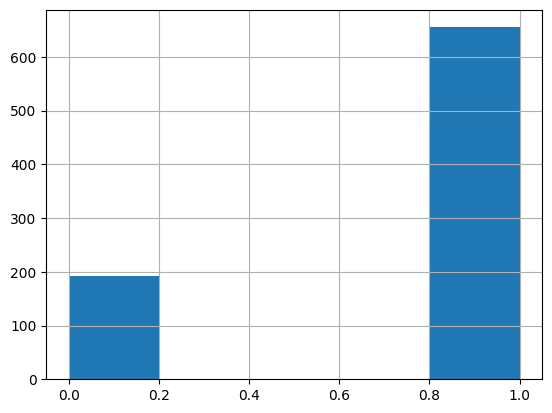

In [47]:
features["success"].hist(bins=5)

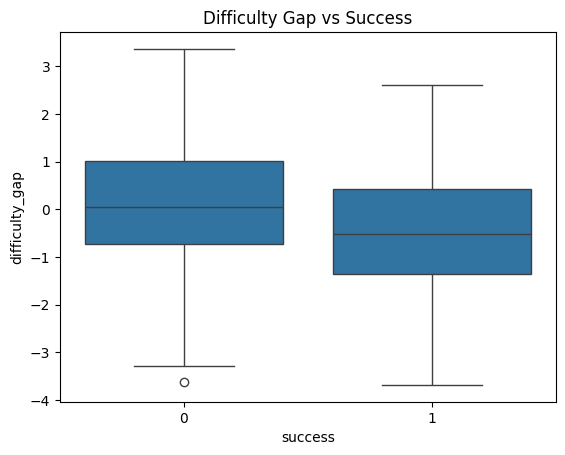

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="success", y="difficulty_gap", data=features)
plt.title("Difficulty Gap vs Success")
plt.show()


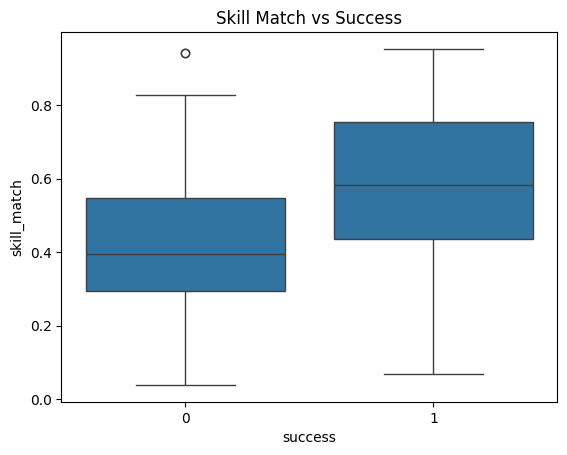

In [49]:
sns.boxplot(x="success", y="skill_match", data=features)
plt.title("Skill Match vs Success")
plt.show()

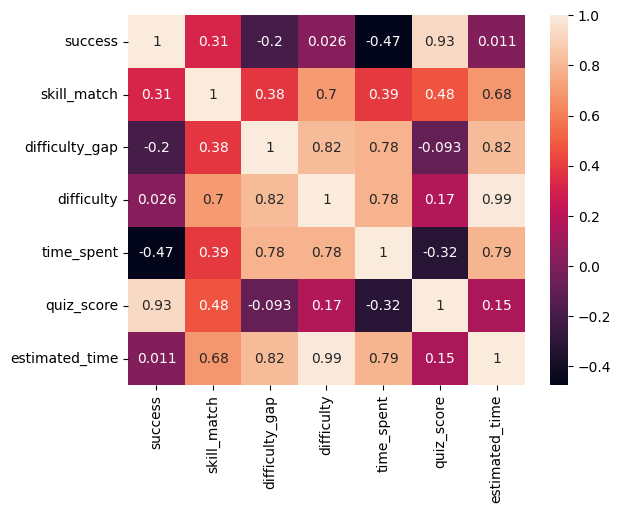

In [50]:
sns.heatmap(features[["success", "skill_match", "difficulty_gap", "difficulty", "time_spent", "quiz_score", "estimated_time"]].corr(), annot=True)
plt.show()

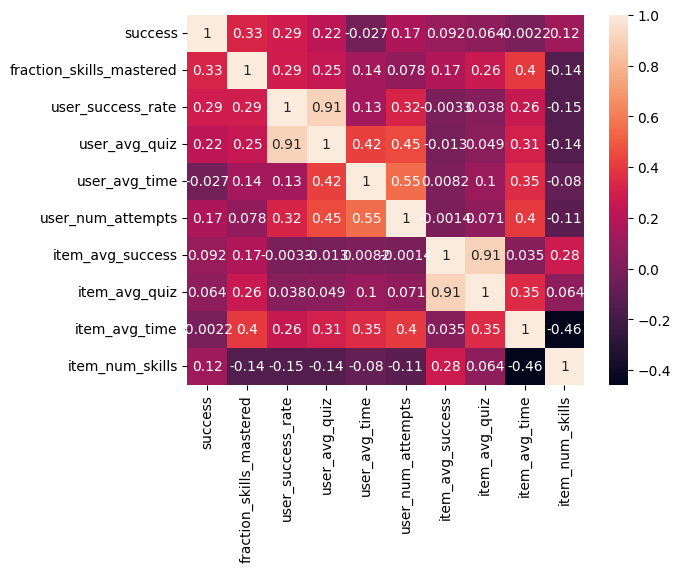

In [51]:
sns.heatmap(features[["success", "fraction_skills_mastered", "user_success_rate", "user_avg_quiz", "user_avg_time", "user_num_attempts", "item_avg_success", "item_avg_quiz", "item_avg_time", "item_num_skills"]].corr(), annot=True)
plt.show()

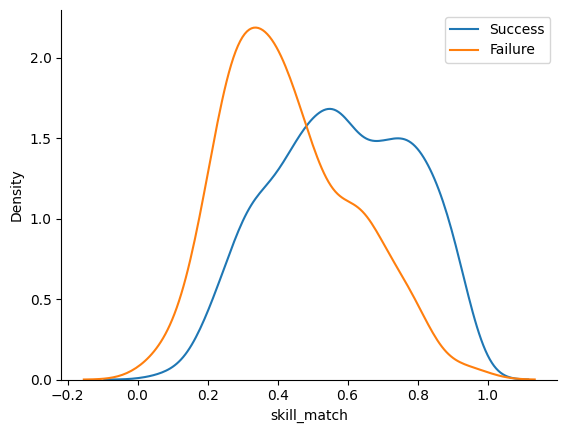

In [54]:
import seaborn as sns
sns.kdeplot(features[features["success"]==1]["skill_match"], label="Success")
sns.kdeplot(features[features["success"]==0]["skill_match"], label="Failure")
sns.despine()
plt.legend()
plt.show()


## Model Training and Evaluation

Now that we have our features, let's train some models to predict success. We'll start with logistic regression as a baseline, then try more complex models.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Prepare data - Remove features that depend on success (data leakage)
feature_cols = [
    'skill_gap', 'fraction_skills_mastered', 'difficulty_gap', 'user_success_rate',
    'user_avg_quiz', 'user_avg_time', 'user_num_attempts', 'item_avg_success',
    'item_avg_quiz', 'item_avg_time', 'item_num_skills', 'skill_match', 'difficulty',
    'estimated_time'  # Removed 'time_spent' and 'quiz_score' as they are outcomes
]

X = features[feature_cols]
y = features['success']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 677 samples
Test set: 170 samples


In [58]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.3f}")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00       132

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170

AUC-ROC: 1.000


Cross-validation accuracy: 1.000 (+/- 0.000)
Train accuracy: 1.000
Test accuracy: 1.000


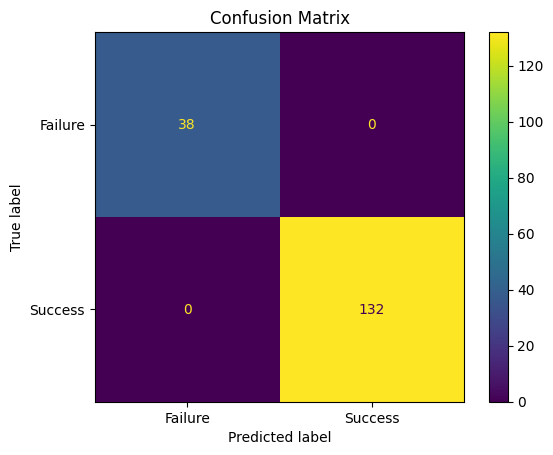

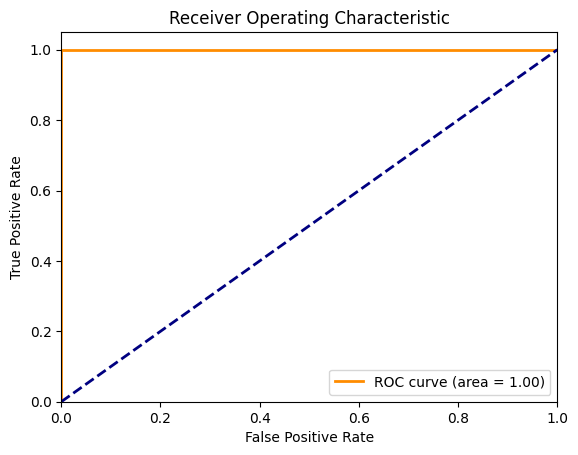

Top 10 Feature Importances:
                     feature  importance
14                quiz_score    4.053866
9              item_avg_time    0.342287
11               skill_match    0.311962
15            estimated_time    0.217113
10           item_num_skills    0.209726
12                difficulty    0.149913
6          user_num_attempts    0.125267
2             difficulty_gap    0.122728
1   fraction_skills_mastered    0.094208
5              user_avg_time    0.049532


In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Check for overfitting with cross-validation
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Train accuracy
y_pred_train = lr_model.predict(X_train_scaled)
train_accuracy = (y_pred_train == y_train).mean()
print(f"Train accuracy: {train_accuracy:.3f}")
print(f"Test accuracy: {(y_pred_lr == y_test).mean():.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Failure', 'Success'])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance (Logistic Regression coefficients)
importance = lr_model.coef_[0]
feature_importance = pd.DataFrame({'feature': feature_cols, 'importance': importance})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("Top 10 Feature Importances:")
print(feature_importance.head(10))

### Next Steps
- Try Random Forest or Gradient Boosting for better performance.
- Handle class imbalance if needed (e.g., SMOTE).
- Feature selection or engineering.
- Cross-validation for robust evaluation.